In [1]:
# Učitavanje potrebnih biblioteka
import pandas as pd

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split

In [ ]:
dionice = pd.read_csv('TSLA.csv') 
dionice.head()

In [3]:
 dionice.shape

(2416, 7)

In [4]:
dionice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [5]:
dionice = dionice.drop(['Adj Close'], axis=1)
dionice.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [6]:
splitted = dionice['Date'].str.split('-', expand=True) 

dionice['day'] = splitted[2].astype('int') 
dionice['month'] = splitted[1].astype('int') 
dionice['year'] = splitted[0].astype('int') 

dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [7]:
dionice['kraj_kvartala'] = np.where(dionice['month']%3==0,1,0) 
dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


In [8]:
# Izračun postotne promjene
dionice['%PromjenaClose'] = dionice['Close'].pct_change() * 100

dionice['%PromjenaVolume'] = dionice['Volume'].pct_change() * 100


dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala,%PromjenaClose,%PromjenaVolume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,NaN,NaN
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,-0.251147,-8.415084
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,-7.847256,-52.180414
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,-12.568297,-37.462890
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,-16.093749,33.602475


In [9]:
# Izračun prosječnog prometa trgovanja u posljednjih 14 dana na temelju stupca Volume
dionice['14D_Mean_Volume'] = dionice['Volume'].rolling(window=14).mean()

# Izračun prosječne završne cijene u posljednjih 14 dana na temelju stupca Close
dionice['14D_Mean_Close'] = dionice['Close'].rolling(window=14).mean()


dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala,%PromjenaClose,%PromjenaVolume,14D_Mean_Volume,14D_Mean_Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,NaN,NaN,NaN,NaN
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,-0.251147,-8.415084,NaN,NaN
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,-7.847256,-52.180414,NaN,NaN
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,-12.568297,-37.462890,NaN,NaN
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,-16.093749,33.602475,NaN,NaN


In [10]:
dionice['open-close'] = dionice['Open'] - dionice['Close'] 
dionice['low-high'] = dionice['Low'] - dionice['High'] 

# Kreiranje novog stupca Kupiti koji je uvjetovan s 2 uvjeta; da li je trenutna završna cijena (Close) veća od prosječne završne cijene u posljednjih 30 dana
# i da li je promet trgovanja (Volume) veći za barem 5% u odnosu na prosječni promet u posljednjih 30 dana
# ukoliko su oba uvjeta ispunjena dobiva se vrijednost (1-DA) da se dionica treba kupiti, u protivnom se ne kupuje


dionice['Kupiti'] = np.where(
   (dionice['Close'] > dionice['14D_Mean_Close']) & 
   (dionice['%PromjenaVolume'] > 20),
    1, 
    0
)
    



dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala,%PromjenaClose,%PromjenaVolume,14D_Mean_Volume,14D_Mean_Close,open-close,low-high,Kupiti
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,NaN,NaN,NaN,NaN,-4.889999,-7.459999,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,-0.251147,-8.415084,NaN,NaN,1.960001,-7.120001,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,-7.847256,-52.180414,NaN,NaN,3.040001,-5.650000,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,-12.568297,-37.462890,NaN,NaN,3.799999,-4.390001,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,-16.093749,33.602475,NaN,NaN,3.889999,-4.170000,0


In [11]:
dionice = dionice.drop(['Date'], axis=1)
dionice = dionice.drop(['day'], axis=1)
dionice = dionice.drop(['month'], axis=1)
dionice = dionice.drop(['year'], axis=1)
dionice = dionice.drop(['Open'], axis=1)

#dionice = dionice.drop(['High'], axis=1)
#dionice = dionice.drop(['Low'], axis=1)
#dionice = dionice.drop(['Close'], axis=1)
#dionice = dionice.drop(['Volume'], axis=1)


# Brišemo prvih 14 redova iz tablice kako bismo se riješili praznih vrijednosti varijabli 14D_Mean_Volume i 14D_Mean_Close
dionice = dionice.iloc[14:].reset_index(drop=True)

dionice.head()

,High,Low,Close,Volume,kraj_kvartala,%PromjenaClose,%PromjenaVolume,14D_Mean_Volume,14D_Mean_Close,open-close,low-high,Kupiti
0,21.850000,20.049999,20.299999,1825300,0,-7.348247,-26.591595,5.417643e+06,19.252142,1.550001,-1.800001,0
1,20.900000,19.500000,20.219999,1252500,0,-0.394089,-31.381143,4.279457e+06,18.994285,0.440001,-1.400000,0
2,21.250000,20.370001,21.000000,957800,0,3.857572,-23.528942,3.760814e+06,18.925714,-0.500000,-0.879999,0
3,21.559999,21.059999,21.290001,653600,0,1.380957,-31.760284,3.440371e+06,19.075000,-0.100000,-0.500000,0
4,21.500000,20.299999,20.950001,922200,0,-1.596994,41.095471,3.015750e+06,19.420714,0.549999,-1.200001,1


In [12]:
y1 = dionice.iloc[:,-1]
y1.shape

(2402,)

In [13]:
X1 = dionice.iloc[:,:-1]
X1.shape

(2402, 11)

In [14]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state = 0)

In [15]:
X_train1.shape

(1801, 11)

In [16]:
X_test1.shape

(601, 11)

In [17]:
y_train1.shape

(1801,)

In [18]:
y_test1.shape

(601,)

In [19]:
dionice.head()

,High,Low,Close,Volume,kraj_kvartala,%PromjenaClose,%PromjenaVolume,14D_Mean_Volume,14D_Mean_Close,open-close,low-high,Kupiti
0,21.850000,20.049999,20.299999,1825300,0,-7.348247,-26.591595,5.417643e+06,19.252142,1.550001,-1.800001,0
1,20.900000,19.500000,20.219999,1252500,0,-0.394089,-31.381143,4.279457e+06,18.994285,0.440001,-1.400000,0
2,21.250000,20.370001,21.000000,957800,0,3.857572,-23.528942,3.760814e+06,18.925714,-0.500000,-0.879999,0
3,21.559999,21.059999,21.290001,653600,0,1.380957,-31.760284,3.440371e+06,19.075000,-0.100000,-0.500000,0
4,21.500000,20.299999,20.950001,922200,0,-1.596994,41.095471,3.015750e+06,19.420714,0.549999,-1.200001,1


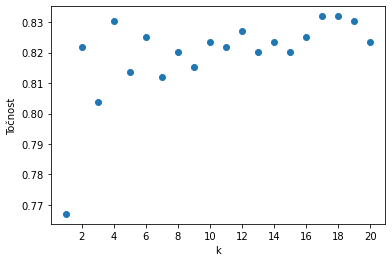

In [20]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,21)
scores = []

for k in k_range:
    knn_class = KNeighborsClassifier(n_neighbors = k)
    knn_class.fit(X_train1, y_train1)
    scores.append(knn_class.score(X_test1, y_test1))

plt.figure()
plt.xlabel('k')
plt.ylabel('Točnost')
plt.scatter(k_range, scores)
plt.xticks([2,4,6,8,10,12,14,16,18,20]);

In [21]:
knn_class = KNeighborsClassifier(n_neighbors = 17)

knn_class.fit(X_train1, y_train1)

print(knn_class.predict(X_test1))

print('Točnost na skupu za testiranje: {:.3f}'.format(knn_class.score(X_test1, y_test1)))



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train1, y_train1)

print(log_reg.predict(X_test1))

print('Točnost: {:.3f}'.format(log_reg.score(X_test1, y_test1)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [23]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[-3.17978909e-11 -3.16243071e-11 -3.07474889e-11  1.96304039e-07
  -1.80791071e-13  1.93614072e-12  3.67961604e-11 -4.57427275e-07
  -3.78866197e-11 -2.27265832e-12  1.73583855e-13]]
[-4.13072965e-13]


In [24]:
from sklearn.neural_network import MLPClassifier

nn_class = MLPClassifier(hidden_layer_sizes = [800,800,800,800,800], random_state = 0, solver='lbfgs')

nn_class.fit(X_train1, y_train1)

print(nn_class.predict(X_test1))

print('Točnost na skupu za testiranje: {:.2f}'.format(nn_class.score(X_test1, y_test1)))

print(X_train1.shape, X_test1.shape)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [25]:
matrica_konfuzije1 = pd.crosstab(knn_class.predict(X_test1), y_test1.values)
print(matrica_konfuzije1)

matrica_konfuzije2 = pd.crosstab(log_reg.predict(X_test1), y_test1.values)
print(matrica_konfuzije2)

matrica_konfuzije3 = pd.crosstab(nn_class.predict(X_test1), y_test1.values)
print(matrica_konfuzije3)

col_0    0   1
row_0         
0      488  96
1        5  12
col_0    0   1
row_0         
0      485  90
1        8  18
col_0    0   1
row_0         
0      464  67
1       29  41


In [26]:
# Odaziv za KNN
TP_knn = matrica_konfuzije1.loc[1, 1]  # TP za KNN
FN_knn = matrica_konfuzije1.loc[0, 1]  # FN za KNN
recall_knn = TP_knn / (TP_knn + FN_knn) if (TP_knn + FN_knn) != 0 else 0
print('Recall for KNN: {:.2f}'.format(recall_knn))

# Odaziv za Log Reg
TP_logreg = matrica_konfuzije2.loc[1, 1]  
FN_logreg = matrica_konfuzije2.loc[0, 1]  
recall_logreg = TP_logreg / (TP_logreg + FN_logreg) if (TP_logreg + FN_logreg) != 0 else 0
print('Recall for Logistic Regression: {:.2f}'.format(recall_logreg))

# Odaziv za Neuronske Mreže
TP_nn = matrica_konfuzije3.loc[1, 1] if 1 in matrica_konfuzije3.index else 0  
FN_nn = matrica_konfuzije3.loc[0, 1] if 1 in matrica_konfuzije3.columns else 0  
recall_nn = TP_nn / (TP_nn + FN_nn) if (TP_nn + FN_nn) != 0 else 0
print('Recall for Neural Networks: {:.2f}'.format(recall_nn))

print('-'*50)

# Točnost za KNN
TP_knn = matrica_konfuzije1.loc[1, 1]  # TP za KNN
FP_knn = matrica_konfuzije1.loc[1, 0]  # FP za KNN
precision_knn = TP_knn / (TP_knn + FP_knn) if (TP_knn + FP_knn) != 0 else 0
print('Precision for KNN: {:.2f}'.format(precision_knn))

# Točnost za Log Reg
TP_logreg = matrica_konfuzije2.loc[1, 1]  
FP_logreg = matrica_konfuzije2.loc[1, 0]  
precision_logreg = TP_logreg / (TP_logreg + FP_logreg) if (TP_logreg + FP_logreg) != 0 else 0
print('Precision for Logistic Regression: {:.2f}'.format(precision_logreg))

# Točnost za Neuronske Mreže
TP_nn = matrica_konfuzije3.loc[1, 1] if 1 in matrica_konfuzije3.index else 0  
FP_nn = matrica_konfuzije3.loc[1, 0] if 1 in matrica_konfuzije3.index else 0  
precision_nn = TP_nn / (TP_nn + FP_nn) if (TP_nn + FP_nn) != 0 else 0
print('Precision for Neural Networks: {:.2f}'.format(precision_nn))



Recall for KNN: 0.11
Recall for Logistic Regression: 0.17
Recall for Neural Networks: 0.38
--------------------------------------------------
Precision for KNN: 0.71
Precision for Logistic Regression: 0.69
Precision for Neural Networks: 0.59
